In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [282]:
df = pd.read_csv("1.csv")

In [283]:
df

,Time (s),Sound pressure level (dB)
0,0.000000,-63.112794
1,0.286150,NaN
2,0.392024,-62.808009
3,0.499698,-65.502356
4,0.608549,-69.908565
...,...,...
2889,312.088869,-64.464947
2890,312.197407,-64.284056
2891,312.306154,-64.486019
2892,312.414947,-65.629440


In [284]:
df.describe()

,Time (s),Sound pressure level (dB)
count,2894.000000,2886.000000
mean,156.323267,-47.182144
std,90.218260,10.978782
min,0.000000,-77.828566
25%,78.222141,-56.265397
50%,156.320242,-47.833019
75%,234.382920,-37.167796
max,312.521854,-24.318534


<Axes: >

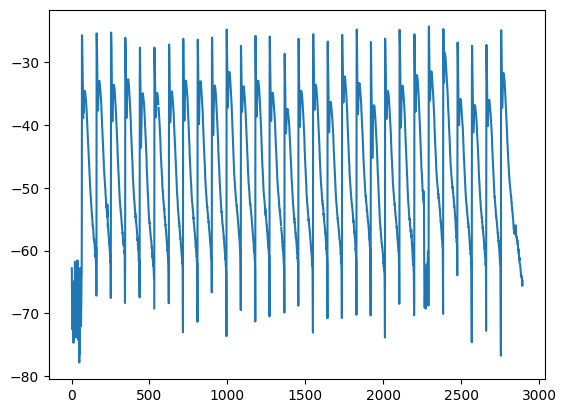

In [285]:
df["Sound pressure level (dB)"].plot()

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2894 entries, 0 to 2893
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time (s)                   2894 non-null   float64
 1   Sound pressure level (dB)  2886 non-null   float64
dtypes: float64(2)
memory usage: 45.3 KB


In [287]:
df["Sound pressure level (dB)"].size

2894

In [288]:
def filter_real_waves(waves) :
    waves = [array for array in waves if len(array) >= 60]
    
    min_len = min(len(array) for array in waves)
    waves = [array[:min_len-1] for array in waves]
    
    for array in waves :
        print(len(array), end=" ")
    return waves

In [289]:
def create_wave_list(filename) :
    segments = []  
    temp = []
    df = pd.read_csv(filename)
    for i in range(10,df["Sound pressure level (dB)"].size):
        temp.append(df["Sound pressure level (dB)"][i] + 100)
        
        if df["Sound pressure level (dB)"][i] - df["Sound pressure level (dB)"][i-3] > 22 :
            segments.append(np.array(temp))
            temp = [] 
    return segments

In [290]:
def draw_wave_list(wave_list) :
    plt.close("all")
    
    plots_per_pavge = 6
    cols = 3
    rows = plots_per_page // cols
    
    for i in range(0, len(wave_list), plots_per_page):
        subset = wave_list[i:i + plots_per_page]
        fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 2.5))
        axes = axes.flatten()
    
        for j in range(len(subset)):
            axes[j].plot(subset[j], marker='o', markersize=2, linewidth=0.8)
            axes[j].set_title(f"Сегмент {i + j + 1}", fontsize=9)
            axes[j].tick_params(labelsize=8)
            axes[j].grid(True)
    
        # Видаляємо зайві графіки, якщо сегментів менше ніж 6
        for j in range(len(subset), len(axes)):
            fig.delaxes(axes[j])
    
        plt.tight_layout()
        plt.show()

In [291]:

segments = create_wave_list("1.csv")

In [292]:
segments = segments[1:]

In [293]:
segments = filter_real_waves(segments)

86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 

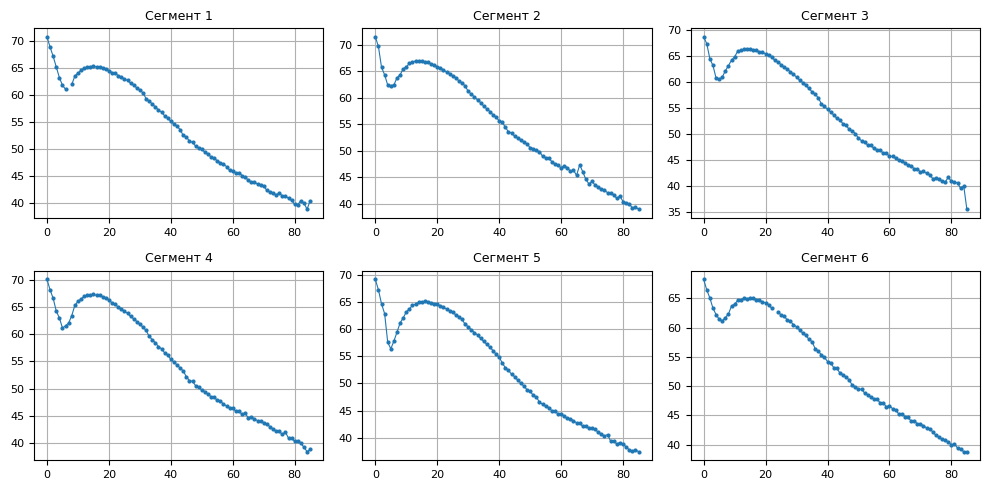

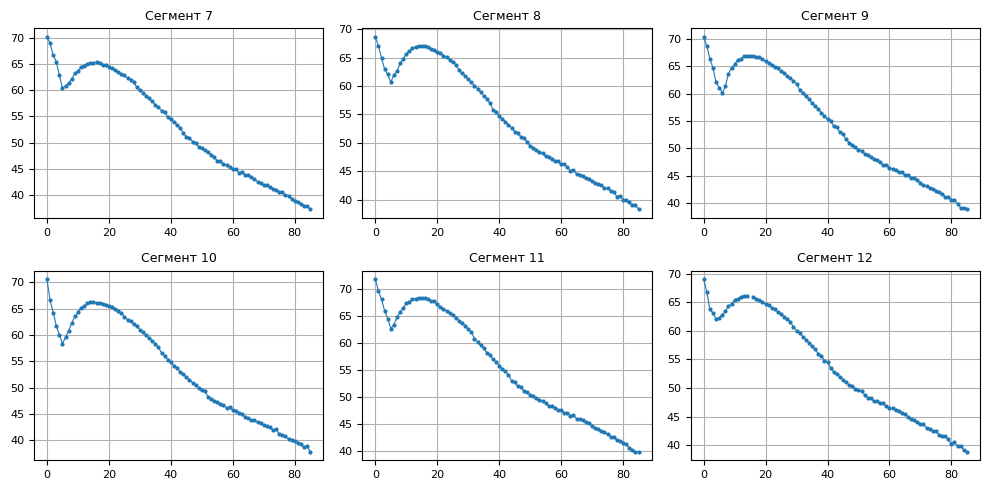

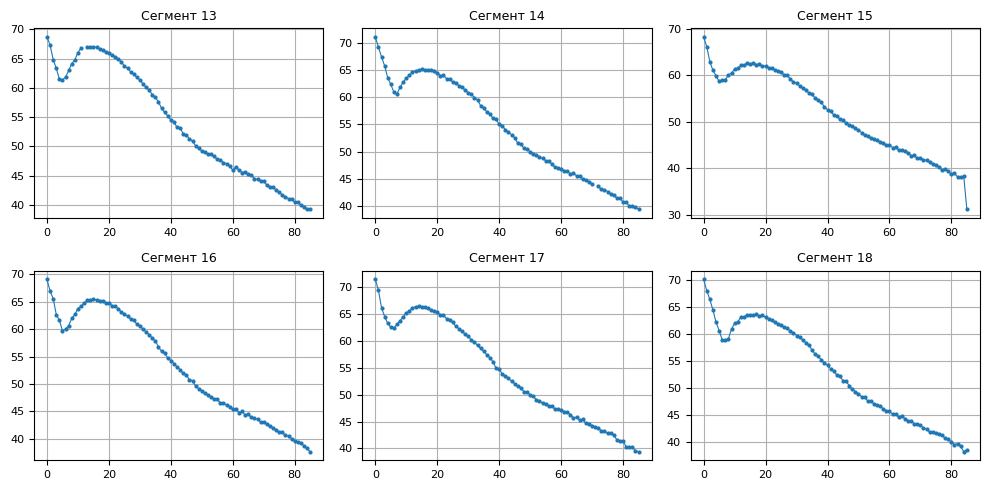

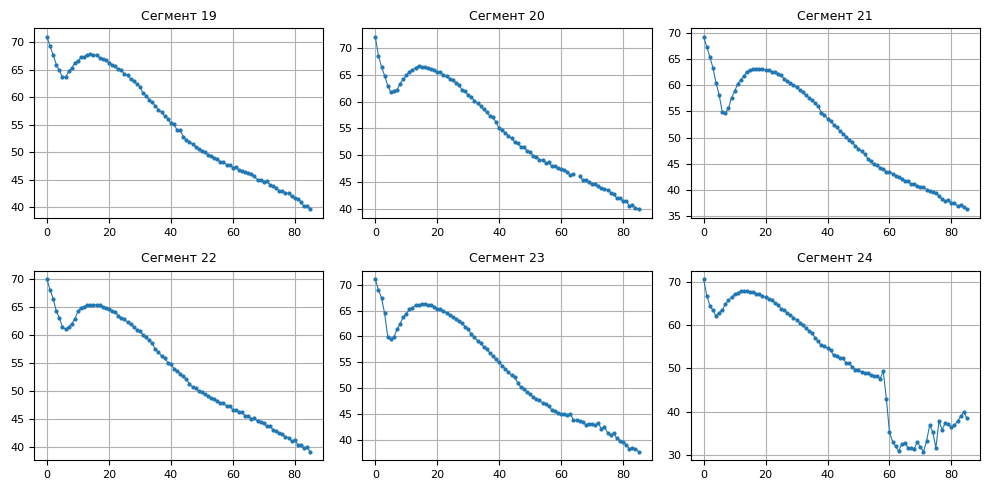

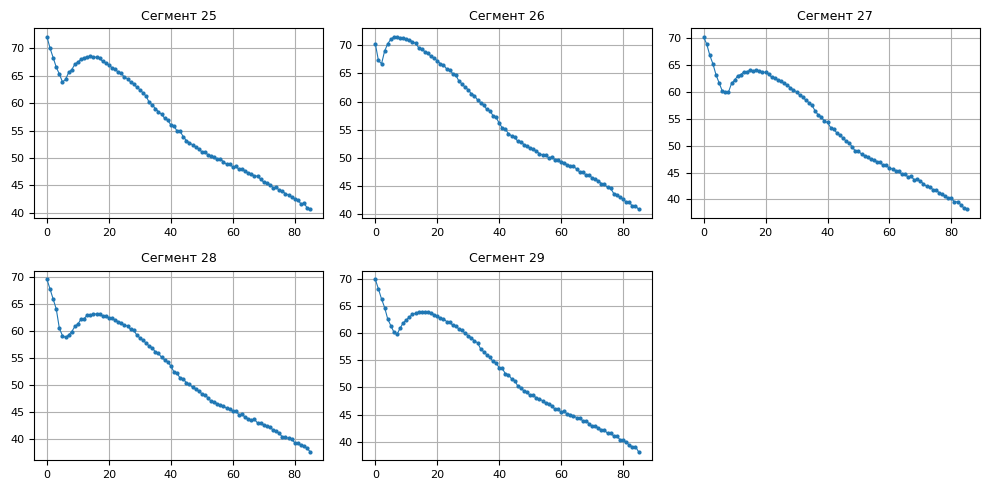

In [294]:
draw_wave_list(segments)

86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 

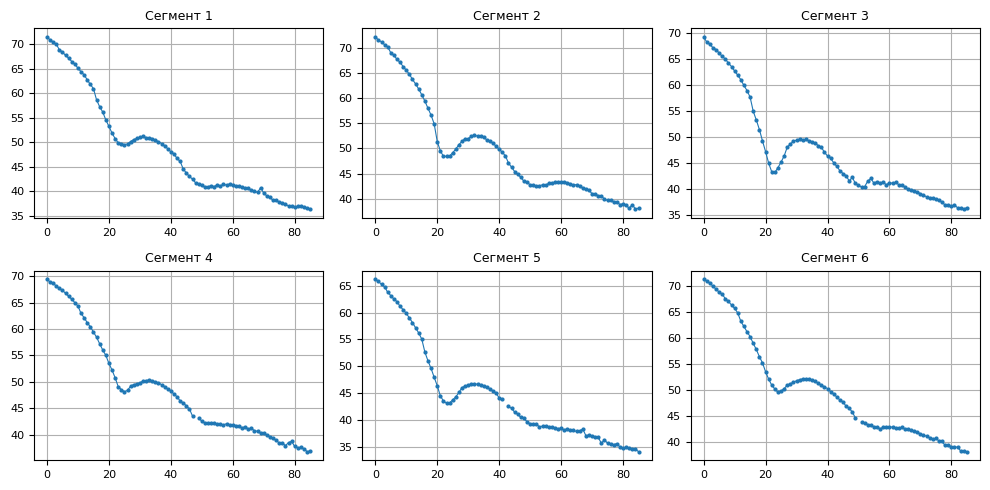

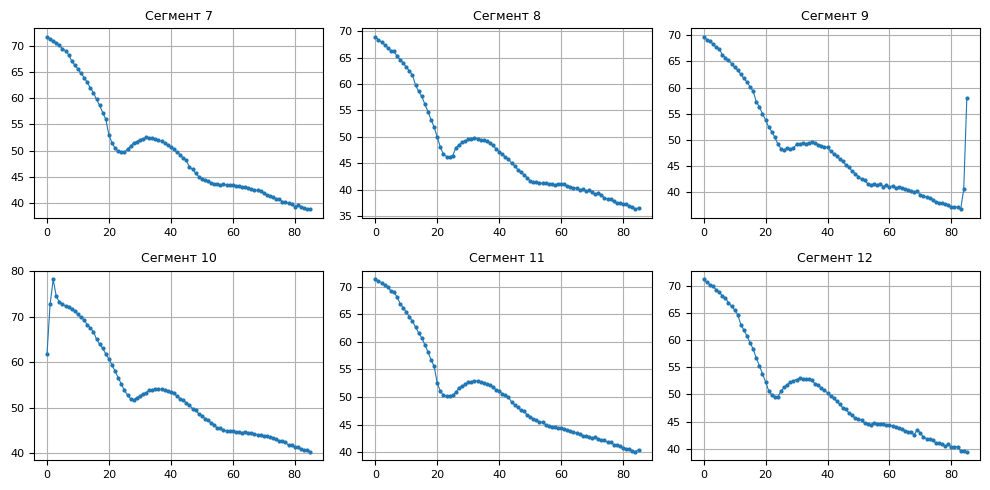

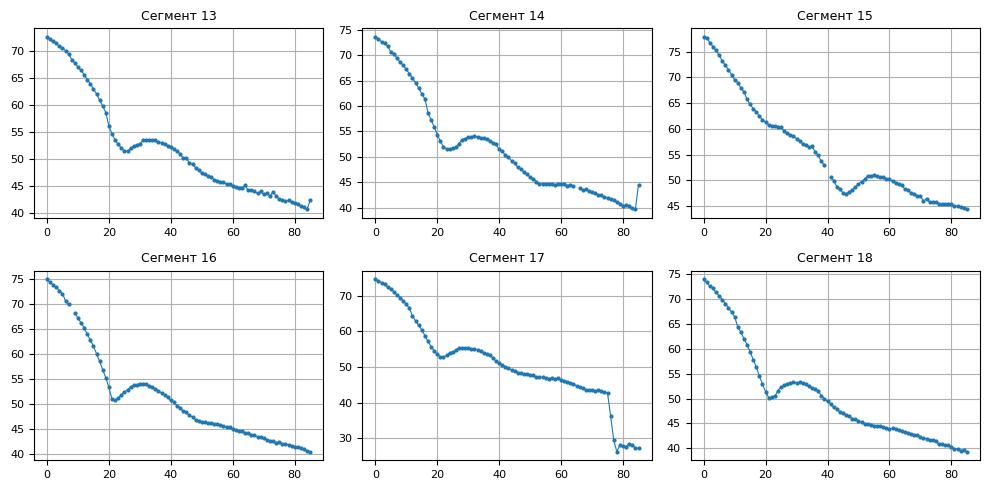

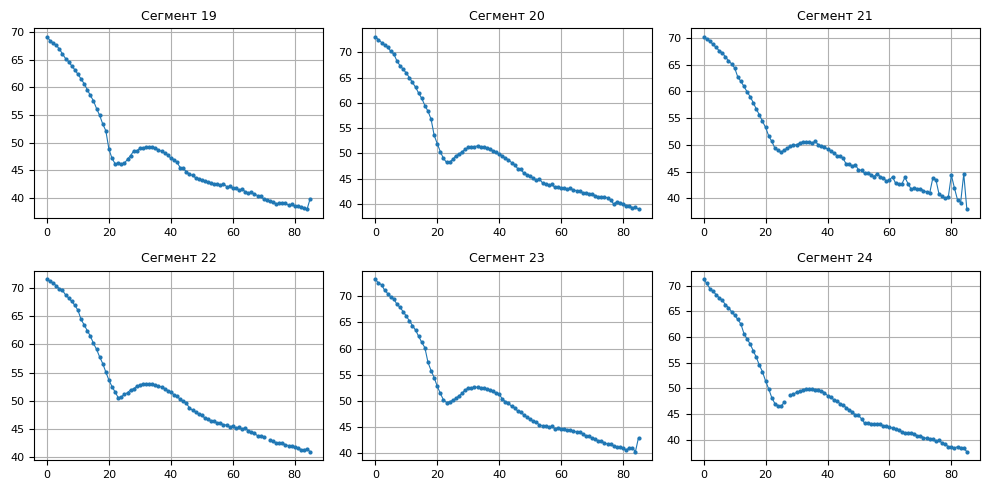

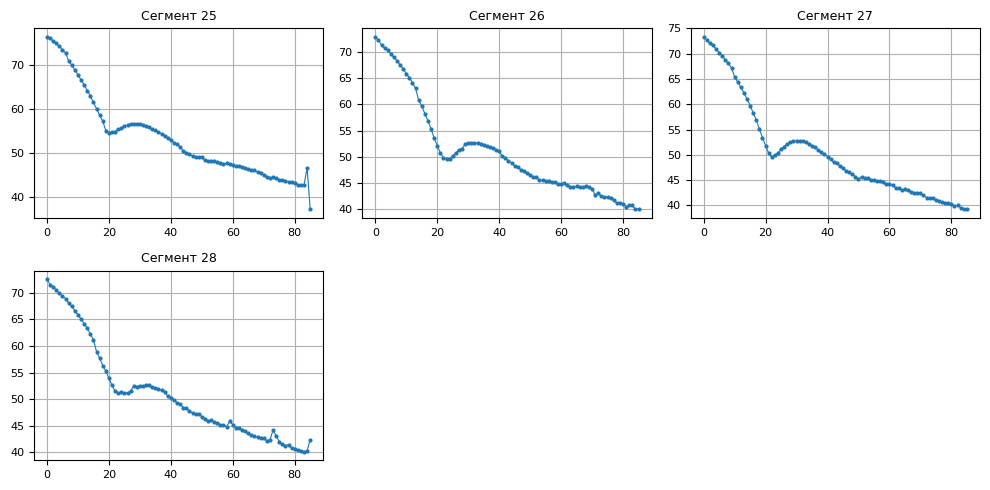

In [295]:
segments = create_wave_list("2.csv")
segments = segments[1:]
segments = filter_real_waves(segments)
draw_wave_list(segments)

87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 87 

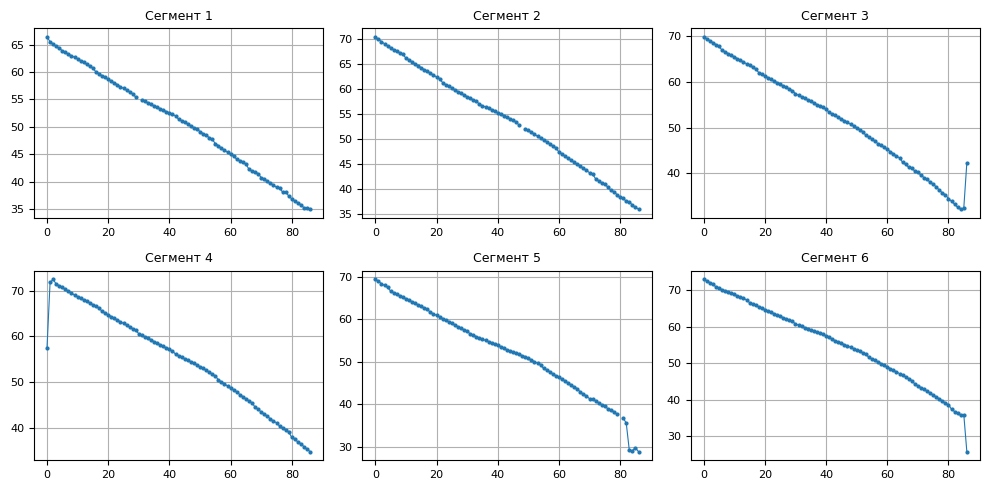

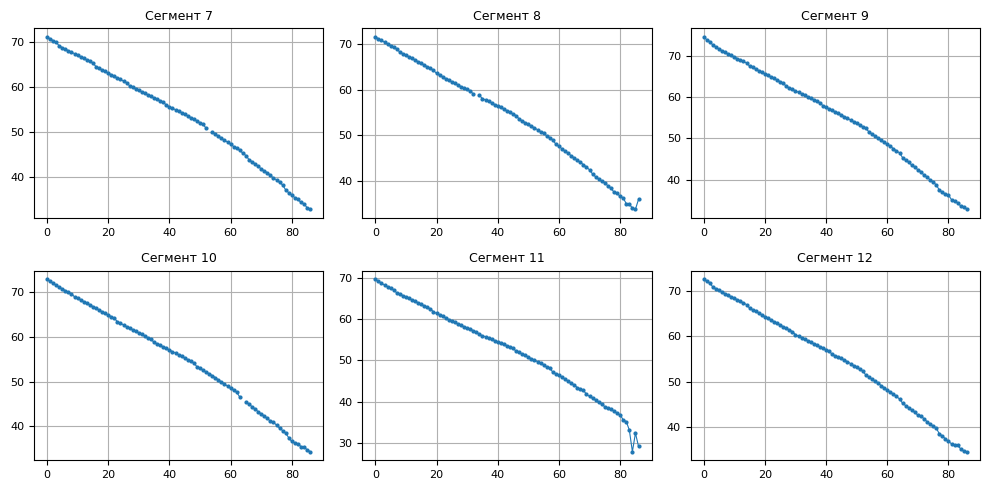

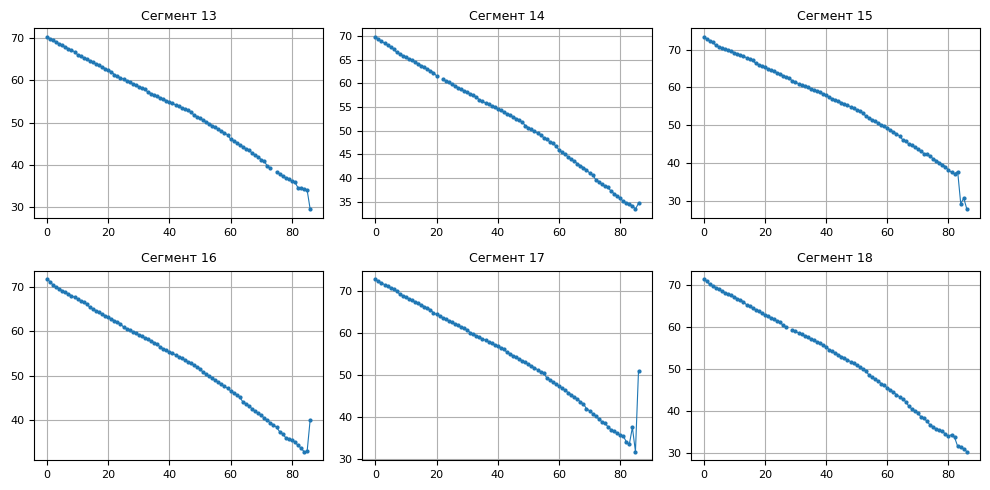

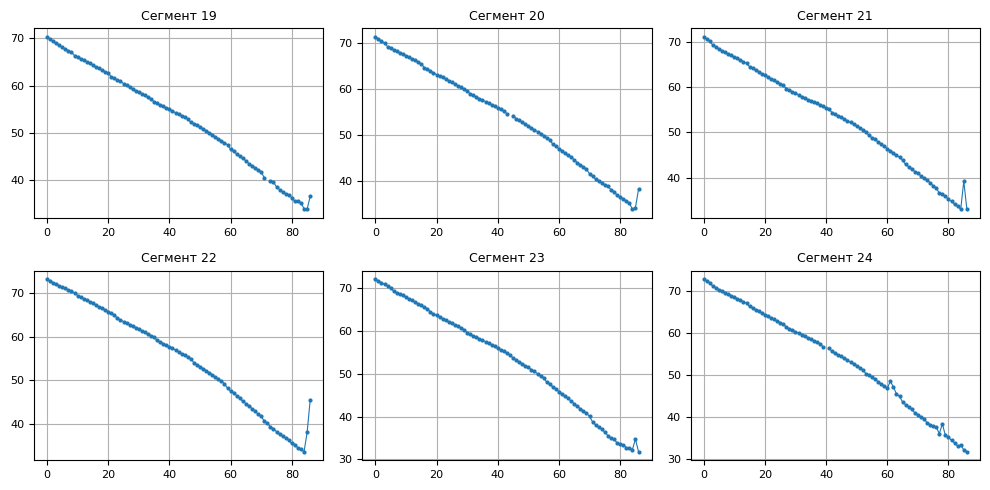

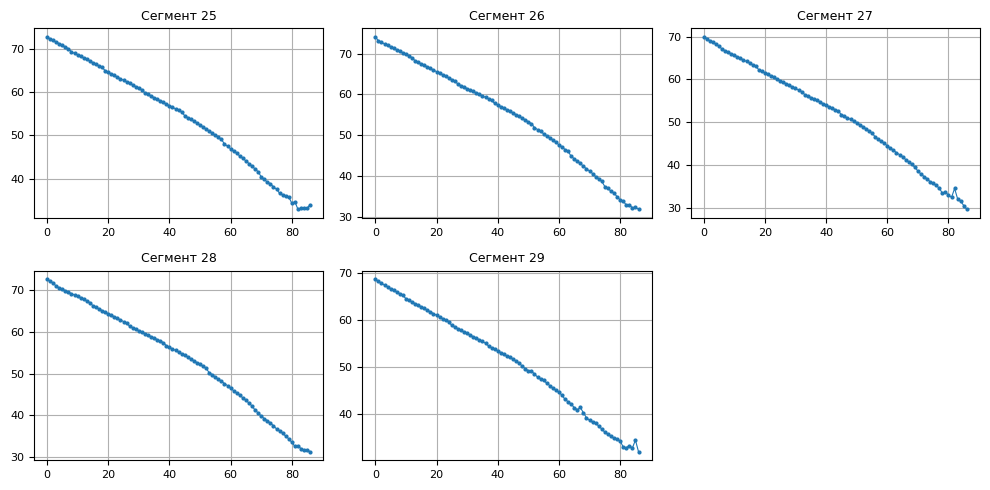

In [296]:
segments = create_wave_list("3.csv")
segments = segments[1:]
segments = filter_real_waves(segments)
draw_wave_list(segments)

86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 86 

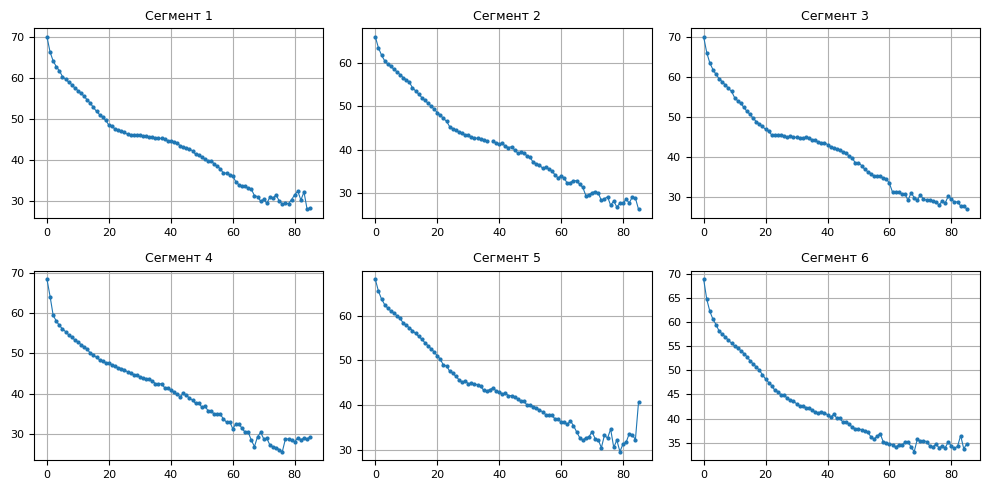

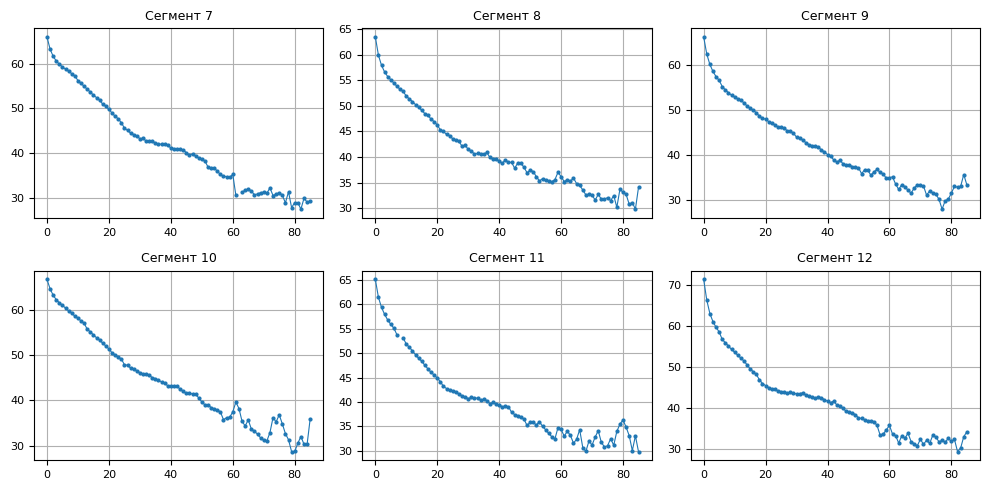

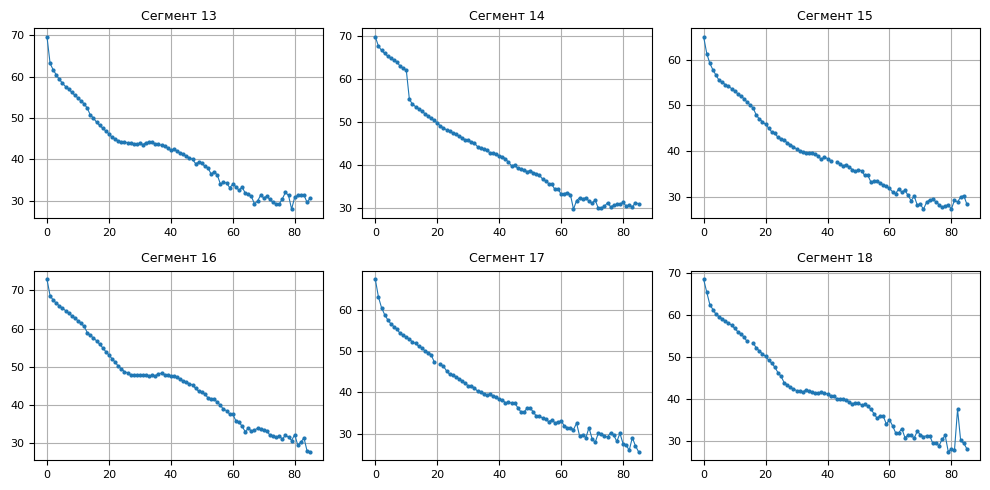

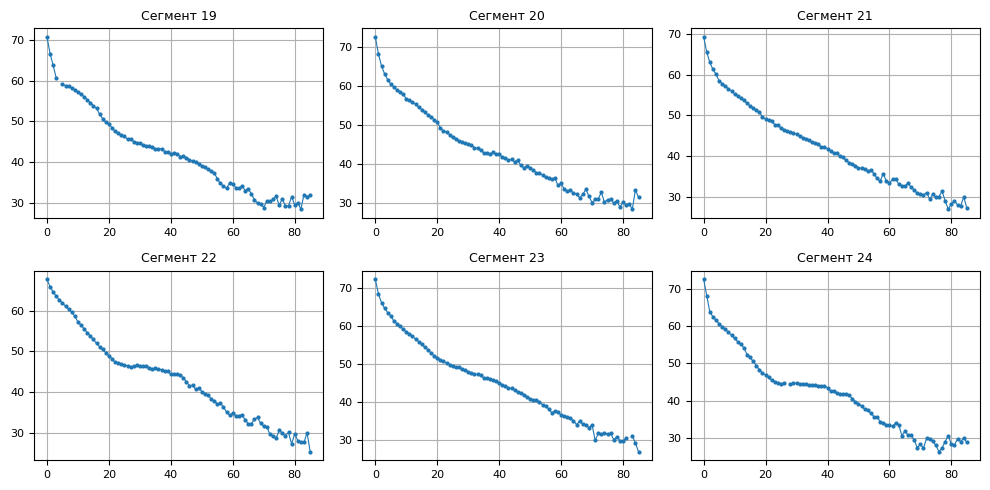

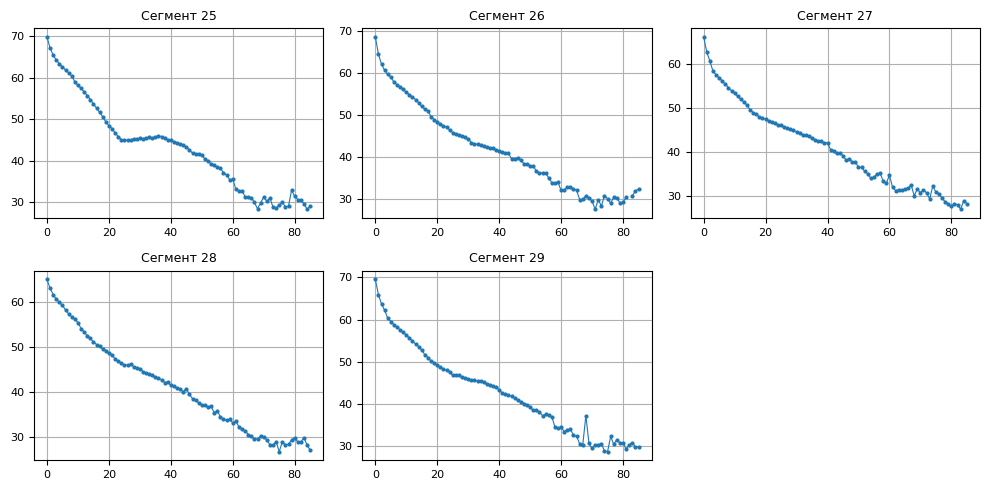

In [297]:
segments = create_wave_list("4.csv")
segments = segments[1:]
segments = filter_real_waves(segments)
draw_wave_list(segments)

64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 

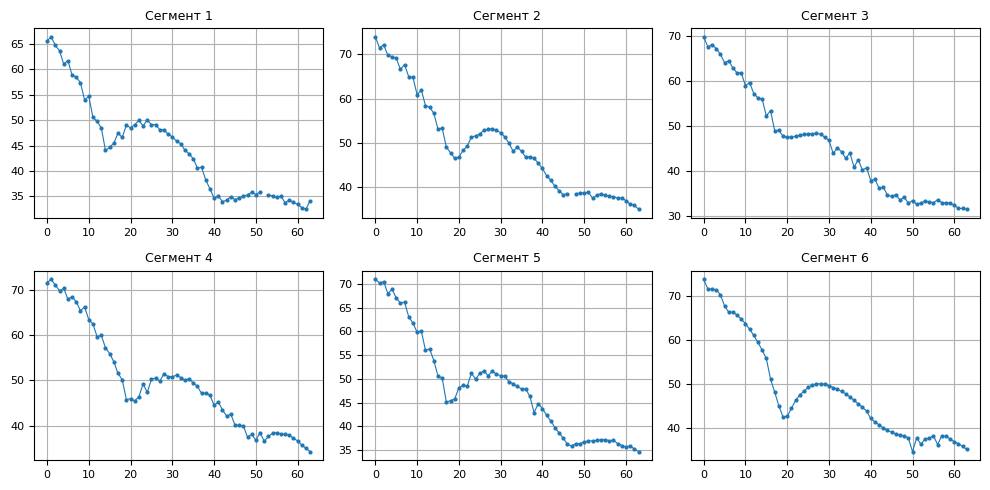

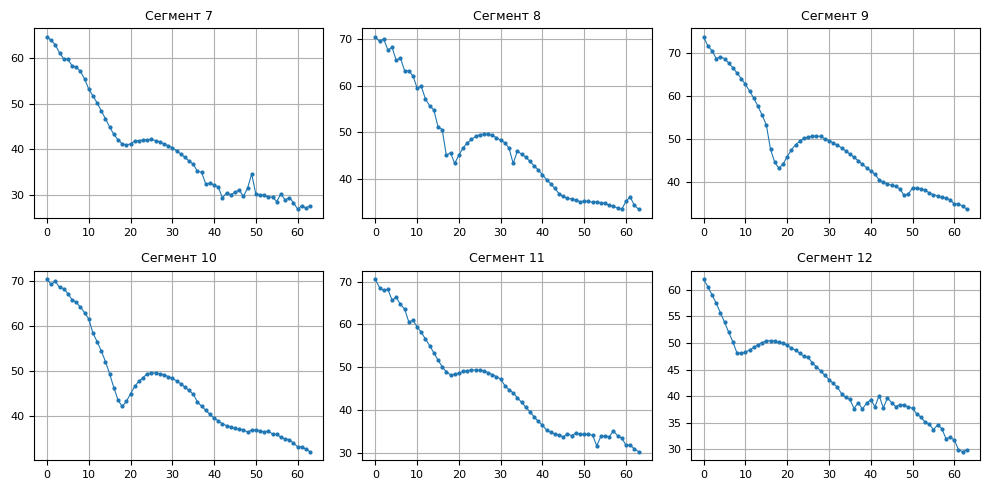

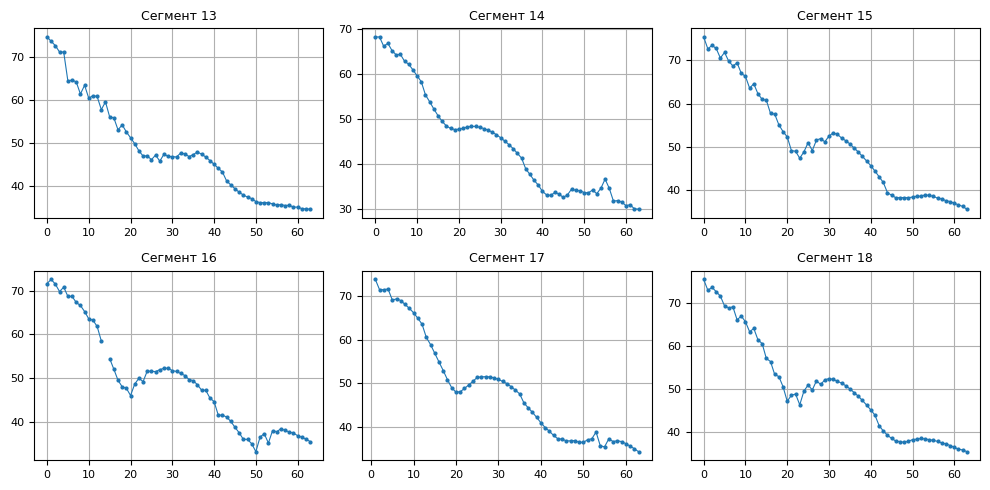

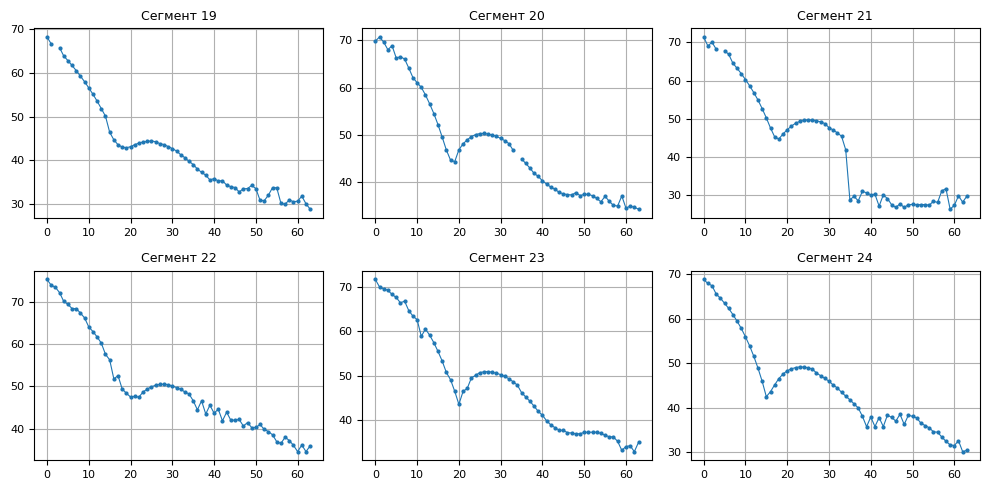

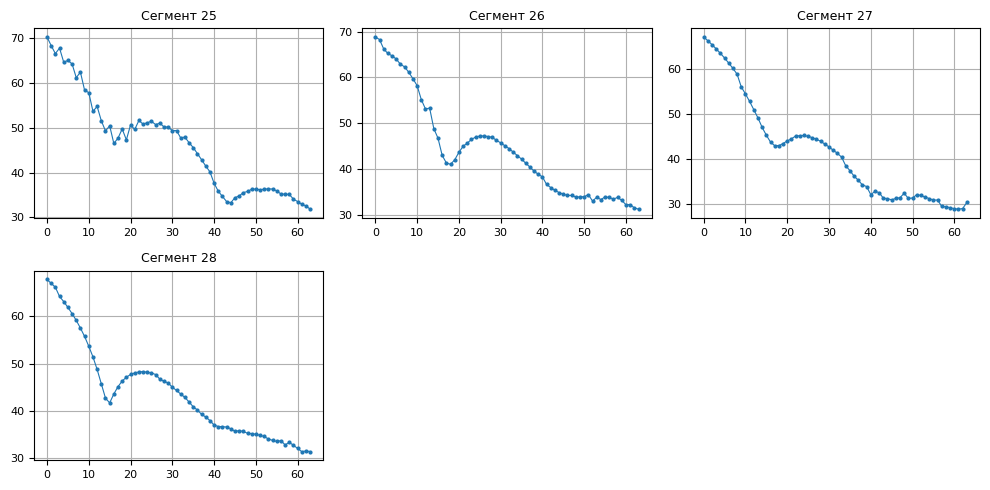

In [310]:
segments = create_wave_list("5.csv")
segments = filter_real_waves(segments)
segments = segments[1:]
draw_wave_list(segments)

85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 

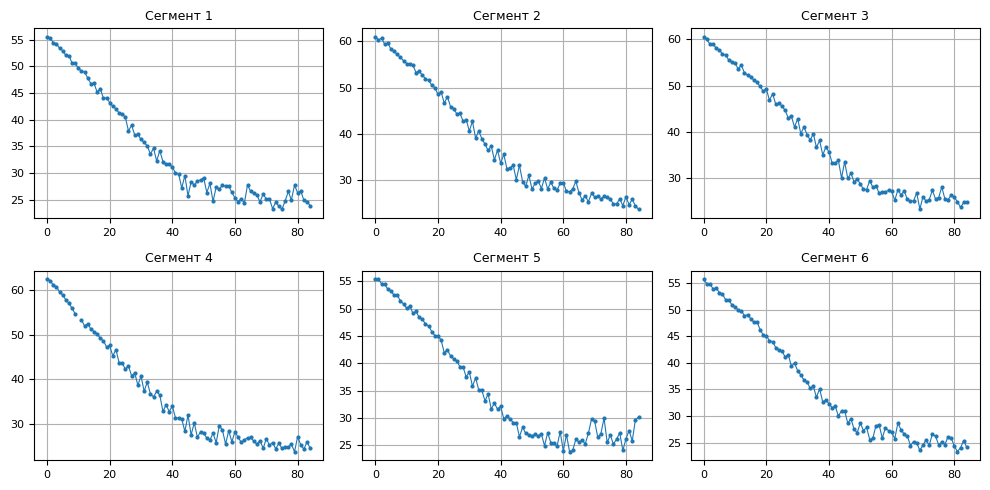

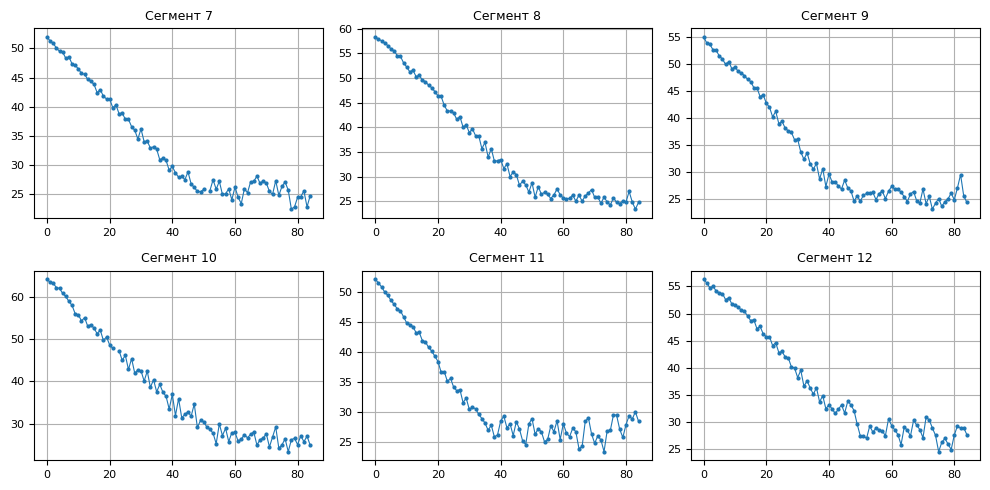

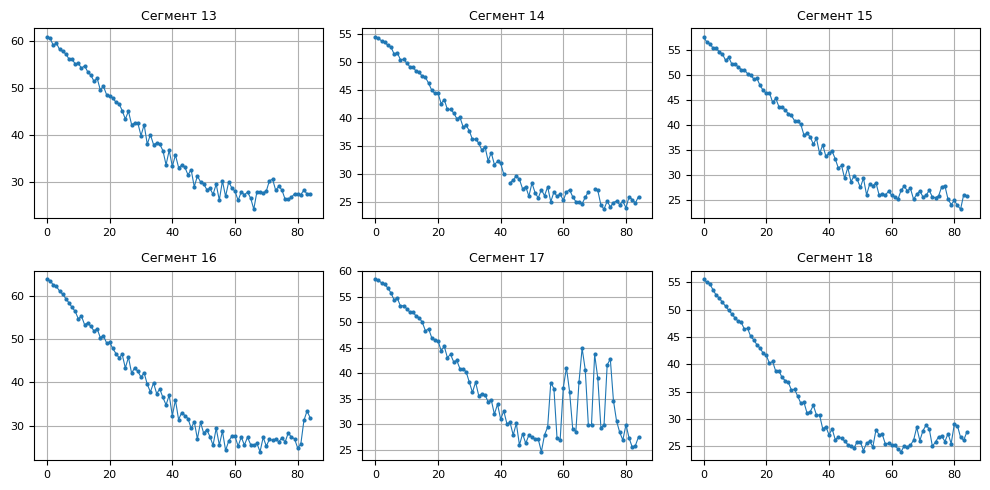

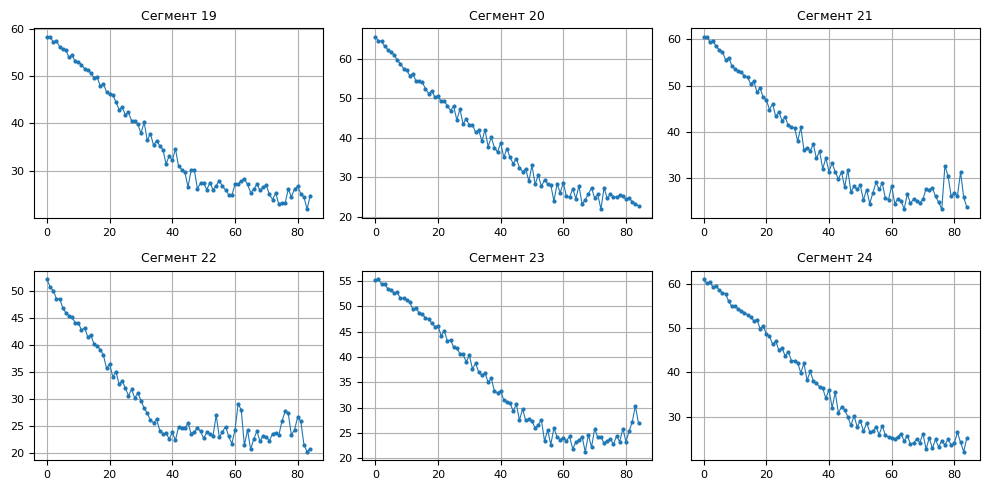

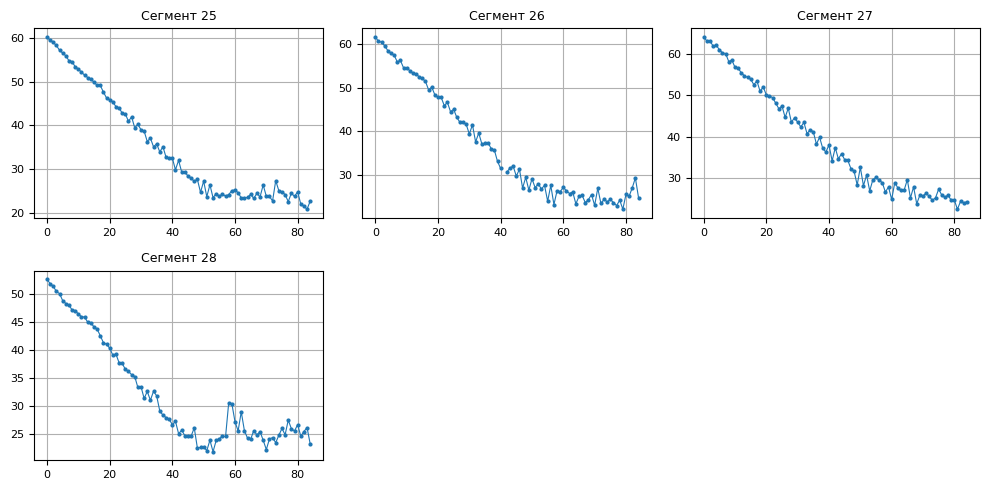

In [312]:
segments = create_wave_list("6.csv")
segments = filter_real_waves(segments)
segments = segments[2:]
draw_wave_list(segments)